## Data Analysis On Zomato Dataset,Exploring Some useful insights and pattern out of data.

Firstly Import all the specific packages or libraries.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

using pandas for reading a csv file.

In [2]:
zomato_data=pd.read_csv('zomato_restaurants_in_India.csv')
zomato_data.head(2)

,res_id,name,establishment,url,address,city,city_id,locality,latitude,longitude,...,price_range,currency,highlights,aggregate_rating,rating_text,votes,photo_count,opentable_support,delivery,takeaway
0,3400299,Bikanervala,['Quick Bites'],https://www.zomato.com/agra/bikanervala-khanda...,"Kalyani Point, Near Tulsi Cinema, Bypass Road,...",Agra,34,Khandari,27.211450,78.002381,...,2,Rs.,"['Lunch', 'Takeaway Available', 'Credit Card',...",4.4,Very Good,814,154,0.0,-1,-1
1,3400005,Mama Chicken Mama Franky House,['Quick Bites'],https://www.zomato.com/agra/mama-chicken-mama-...,"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra,34,Agra Cantt,27.160569,78.011583,...,2,Rs.,"['Delivery', 'No Alcohol Available', 'Dinner',...",4.4,Very Good,1203,161,0.0,-1,-1


Let's check how many columns our dataset contain:

In [3]:
zomato_data.columns

Index(['res_id', 'name', 'establishment', 'url', 'address', 'city', 'city_id',
       'locality', 'latitude', 'longitude', 'zipcode', 'country_id',
       'locality_verbose', 'cuisines', 'timings', 'average_cost_for_two',
       'price_range', 'currency', 'highlights', 'aggregate_rating',
       'rating_text', 'votes', 'photo_count', 'opentable_support', 'delivery',
       'takeaway'],
      dtype='object')

We will see how many rows and columns our dataset contains:

In [4]:
zomato_data.shape

(211944, 26)

Let's just drop the columns that we dont need in our analysis:

In [5]:
drop=['res_id','url','city_id','country_id','address','timings']
zomato_data=zomato_data.drop(drop,axis=1)

In [6]:

zomato_data.head(2)## As you can see our columns are deleted.


,name,establishment,city,locality,latitude,longitude,zipcode,locality_verbose,cuisines,average_cost_for_two,price_range,currency,highlights,aggregate_rating,rating_text,votes,photo_count,opentable_support,delivery,takeaway
0,Bikanervala,['Quick Bites'],Agra,Khandari,27.211450,78.002381,NaN,"Khandari, Agra","North Indian, South Indian, Mithai, Street Foo...",700,2,Rs.,"['Lunch', 'Takeaway Available', 'Credit Card',...",4.4,Very Good,814,154,0.0,-1,-1
1,Mama Chicken Mama Franky House,['Quick Bites'],Agra,Agra Cantt,27.160569,78.011583,282001.0,"Agra Cantt, Agra","North Indian, Mughlai, Rolls, Chinese, Fast Fo...",600,2,Rs.,"['Delivery', 'No Alcohol Available', 'Dinner',...",4.4,Very Good,1203,161,0.0,-1,-1


In [7]:
zomato_data.shape

(211944, 20)

Now Check all unique city we have in our data.

Chech datatypes of our columns:

In [8]:
zomato_data.dtypes

name                     object
establishment            object
city                     object
locality                 object
latitude                float64
longitude               float64
zipcode                  object
locality_verbose         object
cuisines                 object
average_cost_for_two      int64
price_range               int64
currency                 object
highlights               object
aggregate_rating        float64
rating_text              object
votes                     int64
photo_count               int64
opentable_support       float64
delivery                  int64
takeaway                  int64
dtype: object

Now check overall info related to our data.

In [9]:
zomato_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211944 entries, 0 to 211943
Data columns (total 20 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   name                  211944 non-null  object 
 1   establishment         211944 non-null  object 
 2   city                  211944 non-null  object 
 3   locality              211944 non-null  object 
 4   latitude              211944 non-null  float64
 5   longitude             211944 non-null  float64
 6   zipcode               48757 non-null   object 
 7   locality_verbose      211944 non-null  object 
 8   cuisines              210553 non-null  object 
 9   average_cost_for_two  211944 non-null  int64  
 10  price_range           211944 non-null  int64  
 11  currency              211944 non-null  object 
 12  highlights            211944 non-null  object 
 13  aggregate_rating      211944 non-null  float64
 14  rating_text           211944 non-null  object 
 15  

As our zip column has more than 50% null values so it's better to drop that column.

In [10]:
zomato_data.drop(['zipcode'],axis=1,inplace=True)

In [11]:
zomato_data['city'].unique()

array(['Agra', 'Ahmedabad', 'Gandhinagar', 'Ajmer', 'Alappuzha',
       'Allahabad', 'Amravati', 'Amritsar', 'Aurangabad', 'Bangalore',
       'Bhopal', 'Bhubaneshwar', 'Chandigarh', 'Mohali', 'Panchkula',
       'Zirakpur', 'Nayagaon', 'Chennai', 'Coimbatore', 'Cuttack',
       'Darjeeling', 'Dehradun', 'New Delhi', 'Gurgaon', 'Noida',
       'Faridabad', 'Ghaziabad', 'Greater Noida', 'Dharamshala',
       'Gangtok', 'Goa', 'Gorakhpur', 'Guntur', 'Guwahati', 'Gwalior',
       'Haridwar', 'Hyderabad', 'Secunderabad', 'Indore', 'Jabalpur',
       'Jaipur', 'Jalandhar', 'Jammu', 'Jamnagar', 'Jamshedpur', 'Jhansi',
       'Jodhpur', 'Junagadh', 'Kanpur', 'Kharagpur', 'Kochi', 'Kolhapur',
       'Kolkata', 'Howrah', 'Kota', 'Lucknow', 'Ludhiana', 'Madurai',
       'Manali', 'Mangalore', 'Manipal', 'Udupi', 'Meerut', 'Mumbai',
       'Thane', 'Navi Mumbai', 'Mussoorie', 'Mysore', 'Nagpur',
       'Nainital', 'Nasik', 'Nashik', 'Neemrana', 'Ooty', 'Palakkad',
       'Patiala', 'Patna', 'Pudu

In [12]:
zomato_data['city'].nunique()  ## total 99 city we have in our data.

99

In [13]:
df=zomato_data['city'].value_counts().head(10)    ## as we can see maximum number of restaurents are in chennai.
df

Chennai      11630
Mumbai        6497
Bangalore     4971
Pune          4217
Lucknow       4121
Jabalpur      3994
New Delhi     3918
Jaipur        3713
Kochi         3370
Ajmer         3277
Name: city, dtype: int64

Now same for eastablishment:

In [14]:
zomato_data['establishment'].unique()

array(["['Quick Bites']", "['Casual Dining']", "['Bakery']", "['Café']",
       "['Dhaba']", "['Bhojanalya']", "['Bar']", "['Sweet Shop']",
       "['Fine Dining']", "['Food Truck']", "['Dessert Parlour']",
       "['Lounge']", "['Pub']", "['Beverage Shop']", "['Kiosk']",
       "['Paan Shop']", "['Confectionery']", '[]', "['Shack']",
       "['Club']", "['Food Court']", "['Mess']", "['Butcher Shop']",
       "['Microbrewery']", "['Cocktail Bar']", "['Pop up']",
       "['Irani Cafe']"], dtype=object)

Establishment looks like a nice feature to perform EDA, however each value has an unwanted square brackets and quotes which seems noisy. Let's remove them with apply( ) function. Also, we have one value which is an empty string, let's rename it to "NA" to avoid confusion.

In [15]:
zomato_data["establishment"] = zomato_data["establishment"].apply(lambda x:x[2:-2])
print(zomato_data["establishment"].unique())

['Quick Bites' 'Casual Dining' 'Bakery' 'Café' 'Dhaba' 'Bhojanalya' 'Bar'
 'Sweet Shop' 'Fine Dining' 'Food Truck' 'Dessert Parlour' 'Lounge' 'Pub'
 'Beverage Shop' 'Kiosk' 'Paan Shop' 'Confectionery' '' 'Shack' 'Club'
 'Food Court' 'Mess' 'Butcher Shop' 'Microbrewery' 'Cocktail Bar' 'Pop up'
 'Irani Cafe']


In [16]:
zomato_data['establishment'].value_counts()     ##quick bites are more.

Quick Bites        64390
Casual Dining      61808
Café               22760
Bakery              8282
Dessert Parlour     7961
Bar                 6553
Fine Dining         6401
Sweet Shop          6103
Beverage Shop       5571
                    4827
Dhaba               2939
Lounge              2761
Food Court          2722
Kiosk               1829
Bhojanalya          1400
Pub                 1396
Food Truck          1289
Microbrewery         866
Mess                 611
Paan Shop            521
Club                 340
Confectionery        306
Butcher Shop         170
Cocktail Bar          64
Shack                 44
Irani Cafe            24
Pop up                 6
Name: establishment, dtype: int64

In [17]:
zomato_data['locality'].value_counts().head(10)

Civil Lines       3660
Model Town        2241
Ana Sagar Lake    1760
Vijay Nagar       1548
Shastri Nagar     1454
Tirumala          1433
Chauk Bazaar      1361
The Mall Road     1361
Napier Town       1351
Choti Basti       1263
Name: locality, dtype: int64

As we know our cuisines column contain null values let's check how many null values are there in our cuisines column.

In [18]:
zomato_data.isna().sum()

name                       0
establishment              0
city                       0
locality                   0
latitude                   0
longitude                  0
locality_verbose           0
cuisines                1391
average_cost_for_two       0
price_range                0
currency                   0
highlights                 0
aggregate_rating           0
rating_text                0
votes                      0
photo_count                0
opentable_support         48
delivery                   0
takeaway                   0
dtype: int64

In [19]:
zomato_data['opentable_support'].value_counts()

0.0    211896
Name: opentable_support, dtype: int64

In [20]:
zomato_data['opentable_support'].fillna(0.0,inplace=True) ##replacing null values with 0.0 .

In [21]:
zomato_data.isna().sum() ## Now you can see there is no null values in opentable_support.

name                       0
establishment              0
city                       0
locality                   0
latitude                   0
longitude                  0
locality_verbose           0
cuisines                1391
average_cost_for_two       0
price_range                0
currency                   0
highlights                 0
aggregate_rating           0
rating_text                0
votes                      0
photo_count                0
opentable_support          0
delivery                   0
takeaway                   0
dtype: int64

Fill na with 'no cuisines' at cuisines columns.

In [22]:
zomato_data['cuisines']=zomato_data['cuisines'].fillna('No cuisines')

In [23]:
#Again check the null values
zomato_data.isna().sum()

name                    0
establishment           0
city                    0
locality                0
latitude                0
longitude               0
locality_verbose        0
cuisines                0
average_cost_for_two    0
price_range             0
currency                0
highlights              0
aggregate_rating        0
rating_text             0
votes                   0
photo_count             0
opentable_support       0
delivery                0
takeaway                0
dtype: int64

In [24]:
zomato_data['cuisines'].value_counts()

North Indian                                              15996
Fast Food                                                  6721
Cafe                                                       6190
North Indian, Chinese                                      5820
South Indian                                               5217
                                                          ...  
Bakery, Fast Food, Rolls, Beverages                           1
Chinese, North Indian, Italian, Fast Food                     1
South Indian, North Indian, Biryani, Mangalorean              1
Biryani, South Indian, Fast Food, Chinese, Street Food        1
North Indian, Thai, Chinese, Fast Food                        1
Name: cuisines, Length: 9383, dtype: int64

In [25]:
zomato_data['cuisines'].mode()

0    North Indian
dtype: object

I should replace cuisines null values with mode that is with north indian.

In [26]:
zomato_data['cuisines'].fillna(zomato_data['cuisines'].mode(), inplace=True)

We will use top 8 cities and perform a comparison analysis between the cities. Also we will consider the restaurants with an aggregate rating greater than 4.0

In [27]:
delhi=zomato_data[zomato_data['city']=='New Delhi']
bangalore=zomato_data[zomato_data['city']=='Bangalore']
chennai=zomato_data[zomato_data['city']=='Chennai']
mumbai=zomato_data[zomato_data['city']=='Mumbai']
pune=zomato_data[zomato_data['city']=='Pune']
lucknow=zomato_data[zomato_data['city']=='Lucknow']
jabalpur=zomato_data[zomato_data['city']=='Jabalpur']
jaipur=zomato_data[zomato_data['city']=='Jaipur']
delhi_greaterthan4=delhi[delhi['aggregate_rating']>4.0]
bangalore_greaterthan4=bangalore[bangalore['aggregate_rating']>4.0]
chennai_greaterthan4=chennai[chennai['aggregate_rating']>4.0]
mumbai_greaterthan4=mumbai[mumbai['aggregate_rating']>4.0]
pune_greaterthan4=pune[pune['aggregate_rating']>4.0]
jabalpur_greaterthan4=jabalpur[jabalpur['aggregate_rating']>4.0]
jaipur_greaterthan4=jaipur[jaipur['aggregate_rating']>4.0]
lucknow_greaterthan4=lucknow[lucknow['aggregate_rating']>4.0]

Now let's check unique values in 'average_cost_for_two' column.

In [28]:
zomato_data['average_cost_for_two'].unique()

array([  700,   600,   300,  1000,   400,   500,  1200,  1600,   250,
         200,   150,  1500,   800,   450,   850,   350,   900,  6000,
         650,   550,  2500,  6500,  5500,  4300,  3600,  3500,  3200,
        3000,  2800,  2000,  1800,  1400,  1300,  1250,  1150,  1100,
        1050,    50,    60,   100,   750,     0,   220,   260,   950,
        1900,  2400,  2300,  2200,  1700,  1230,    70,   140,   120,
         470,    20,    40,   110,    80,    90,   440,  2100, 14000,
        5000,  4500,  4100,  4000,  3700,  3400,  2700,  2600,  1650,
        1350,   180,  1260,     2,   197,   312,   170,   240,   330,
        3100,  4200,  1850,  3300,  4800,  3800,  3250,  2900,  1750,
         282,    35,   149,  1550,  5100,  6600,  1450,   160,  2250,
        8000,  7000,  3900,  3650,  1020,   320,   360,   280,   130,
       15000,  2501,    30,  1950,  1875,  1190,   309, 12000,   380,
         299,    45,   190,  4600,   880,    75,   620,   999, 10000,
         505, 30000,

There are some outlier in the average_cost_for_two that means there are value which is 0 which is not possible.

highlights - They represent certain features that the restaurant specializes in and wants to highlight to their customers.

In [29]:
zomato_data['highlights'].unique()

array(["['Lunch', 'Takeaway Available', 'Credit Card', 'Dinner', 'Cash', 'Air Conditioned', 'Indoor Seating', 'Pure Veg']",
       "['Delivery', 'No Alcohol Available', 'Dinner', 'Takeaway Available', 'Lunch', 'Cash', 'Indoor Seating']",
       "['No Alcohol Available', 'Dinner', 'Takeaway Available', 'Breakfast', 'Lunch', 'Cash', 'Delivery', 'Outdoor Seating', 'Air Conditioned', 'Self Service', 'Indoor Seating', 'Digital Payments Accepted', 'Pure Veg', 'Desserts and Bakes']",
       ...,
       "['Dinner', 'Delivery', 'Cash', 'Takeaway Available', 'Free Parking', 'Digital Payments Accepted', 'Pure Veg', 'Indoor Seating']",
       "['Dinner', 'Cash', 'Takeaway Available', 'Lunch', 'Delivery', 'Free Parking', 'Indoor Seating', 'Air Conditioned', 'Outdoor Seating', 'Digital Payments Accepted', 'Catering Available', 'Pure Veg']",
       "['Dinner', 'Cash', 'Takeaway Available', 'Debit Card', 'Delivery', 'Credit Card', 'Free Parking', 'Outdoor Seating']"],
      dtype=object)

In [30]:
hl = []
zomato_data["highlights"].apply(lambda x : hl.extend(x[2:-2].split("', '")))
hl = pd.Series(hl)
print("Total number of unique highlights = ", hl.nunique())

Total number of unique highlights =  104


Now let's check some statistical values for aggregate rating,votes and photo count.

In [31]:
zomato_data[['aggregate_rating','votes','photo_count']].describe()

,aggregate_rating,votes,photo_count
count,211944.000000,211944.000000,211944.000000
mean,3.395937,378.001864,256.971224
std,1.283642,925.333370,867.668940
min,0.000000,-18.000000,0.000000
25%,3.300000,16.000000,3.000000
50%,3.800000,100.000000,18.000000
75%,4.100000,362.000000,128.000000
max,4.900000,42539.000000,17702.000000


1)Maximum rating that has been given to a restaurant is 4.9.
2)Maximum votes is 42539 and minimum votes is -18 which is an outlier that is not possible.
3)maximum photo count is 17702.

## That's all about Data Preprocessing and Data cleaning.

## Now let's start with EDA(Exploratory Data Analysis) and Visualization.

### Restaurants Trails.

Here Trails represent restaurants with more than one outlet.

In [32]:
zomato_data.head(2)

,name,establishment,city,locality,latitude,longitude,locality_verbose,cuisines,average_cost_for_two,price_range,currency,highlights,aggregate_rating,rating_text,votes,photo_count,opentable_support,delivery,takeaway
0,Bikanervala,Quick Bites,Agra,Khandari,27.211450,78.002381,"Khandari, Agra","North Indian, South Indian, Mithai, Street Foo...",700,2,Rs.,"['Lunch', 'Takeaway Available', 'Credit Card',...",4.4,Very Good,814,154,0.0,-1,-1
1,Mama Chicken Mama Franky House,Quick Bites,Agra,Agra Cantt,27.160569,78.011583,"Agra Cantt, Agra","North Indian, Mughlai, Rolls, Chinese, Fast Fo...",600,2,Rs.,"['Delivery', 'No Alcohol Available', 'Dinner',...",4.4,Very Good,1203,161,0.0,-1,-1


In [33]:
top_10_trails=zomato_data['name'].sort_values(ascending=True).value_counts()[:10]

In [34]:
top_10_trails.head(10)

Domino's Pizza        3108
KFC                   1343
Cafe Coffee Day       1068
Pizza Hut              936
Subway                 766
Barbeque Nation        725
Burger King            658
McDonald's             578
Keventers              512
The Chocolate Room     461
Name: name, dtype: int64

You can see in above output maximum number of trail is of dominos outlet.

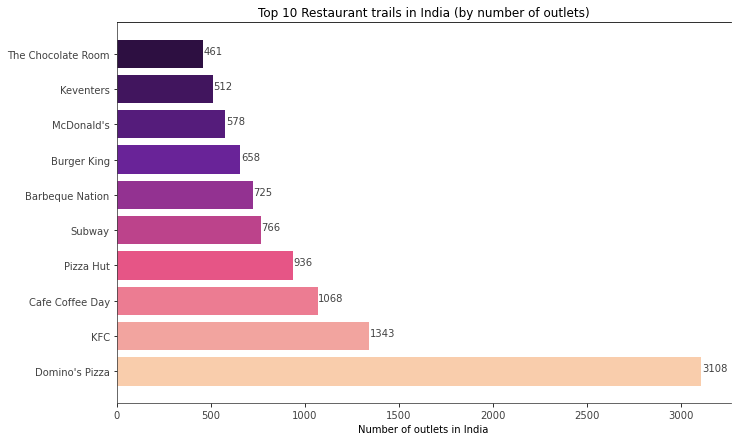

In [35]:
height = top_10_trails.values
bars = top_10_trails.index


fig = plt.figure(figsize=[11,7], frameon=False)
ax = fig.gca()
ax.spines["top"].set_visible("#424242")
ax.spines["right"].set_visible(False)
ax.spines["left"].set_color("#424242")
ax.spines["bottom"].set_color("#424242")

#colors = ["green","blue","magenta","cyan","gray","yellow","purple","violet","orange","red","maroon"]
#random.shuffle(colors)
colors = ["#f9cdac","#f2a49f","#ec7c92","#e65586","#bc438b","#933291","#692398","#551c7b","#41155e","#2d0f41"]
plt.barh( bars,height, color=colors)
 
plt.xticks(color="#424242")
plt.yticks( bars, color="#424242")
plt.xlabel("Number of outlets in India")

for i, v in enumerate(height):
    ax.text(v+3, i, str(v), color='#424242')
plt.title("Top 10 Restaurant trails in India (by number of outlets)")


plt.show()

In [36]:
zomato_data.head(2)

,name,establishment,city,locality,latitude,longitude,locality_verbose,cuisines,average_cost_for_two,price_range,currency,highlights,aggregate_rating,rating_text,votes,photo_count,opentable_support,delivery,takeaway
0,Bikanervala,Quick Bites,Agra,Khandari,27.211450,78.002381,"Khandari, Agra","North Indian, South Indian, Mithai, Street Foo...",700,2,Rs.,"['Lunch', 'Takeaway Available', 'Credit Card',...",4.4,Very Good,814,154,0.0,-1,-1
1,Mama Chicken Mama Franky House,Quick Bites,Agra,Agra Cantt,27.160569,78.011583,"Agra Cantt, Agra","North Indian, Mughlai, Rolls, Chinese, Fast Fo...",600,2,Rs.,"['Delivery', 'No Alcohol Available', 'Dinner',...",4.4,Very Good,1203,161,0.0,-1,-1


In [37]:
outlet=zomato_data['name'].value_counts()

In [38]:
outlets_rating=outlet[outlet>4]

In [39]:
top10_chains2 = zomato_data[zomato_data["name"].isin(outlets_rating.index)].groupby("name").mean()["aggregate_rating"].sort_values(ascending=False)[:10].sort_values(ascending=True)

In [40]:
top10_chains2

name
ARK 2.0 - Courtyard By Marriott    4.9
Cafe Paashh                        4.9
Cafe 651                           4.9
Meraki The Coffee House            4.9
Palladium Social                   4.9
Asia Kitchen By Mainland China     4.9
Craftbar                           4.9
Bhangra                            4.9
Kebabsville - Sayaji Hotel         4.9
Yanki Sizzlers                     4.9
Name: aggregate_rating, dtype: float64

## Establishment Type

Number of restaurants by establishment type:

In [41]:
zomato_data.head(2)

,name,establishment,city,locality,latitude,longitude,locality_verbose,cuisines,average_cost_for_two,price_range,currency,highlights,aggregate_rating,rating_text,votes,photo_count,opentable_support,delivery,takeaway
0,Bikanervala,Quick Bites,Agra,Khandari,27.211450,78.002381,"Khandari, Agra","North Indian, South Indian, Mithai, Street Foo...",700,2,Rs.,"['Lunch', 'Takeaway Available', 'Credit Card',...",4.4,Very Good,814,154,0.0,-1,-1
1,Mama Chicken Mama Franky House,Quick Bites,Agra,Agra Cantt,27.160569,78.011583,"Agra Cantt, Agra","North Indian, Mughlai, Rolls, Chinese, Fast Fo...",600,2,Rs.,"['Delivery', 'No Alcohol Available', 'Dinner',...",4.4,Very Good,1203,161,0.0,-1,-1


In [42]:
east_type_count=zomato_data['establishment'].value_counts()[:5]

In [43]:
east_type_count

Quick Bites        64390
Casual Dining      61808
Café               22760
Bakery              8282
Dessert Parlour     7961
Name: establishment, dtype: int64

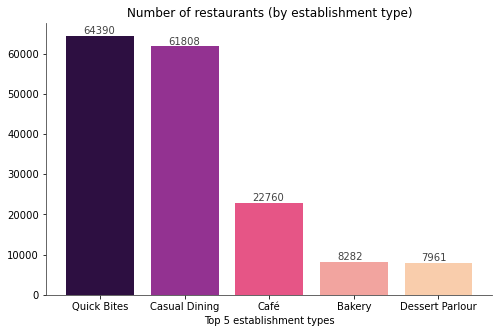

In [44]:
fig=plt.figure(figsize=[8,5],frameon=False)
ax = fig.gca()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_color("#424242")
ax.spines["bottom"].set_color("#424242")


colors = ["#2d0f41",'#933291',"#e65586","#f2a49f","#f9cdac"]
plt.bar(east_type_count.index, east_type_count.values, color=colors)


plt.xlabel("Top 5 establishment types")

for i, v in enumerate(east_type_count):
    ax.text(i-0.2, v+500, str(v), color='#424242')
plt.title("Number of restaurants (by establishment type)")


plt.show()

Aggregate rating based on Establishment:

In [45]:
est_rating=zomato_data.groupby('establishment').mean()['aggregate_rating'].sort_values(ascending=False)[:10].round(2)

In [46]:
est_rating

establishment
Microbrewery     4.44
Cocktail Bar     3.95
Pub              3.94
Lounge           3.75
Fine Dining      3.73
Casual Dining    3.62
Café             3.51
Bar              3.50
Club             3.48
Irani Cafe       3.46
Name: aggregate_rating, dtype: float64

Number of Restaurents by cities:

In [52]:
total_rest_in_cities=zomato_data['city'].value_counts().sort_values(ascending=False)[:10]

In [53]:
total_rest_in_cities

Chennai      11630
Mumbai        6497
Bangalore     4971
Pune          4217
Lucknow       4121
Jabalpur      3994
New Delhi     3918
Jaipur        3713
Kochi         3370
Ajmer         3277
Name: city, dtype: int64

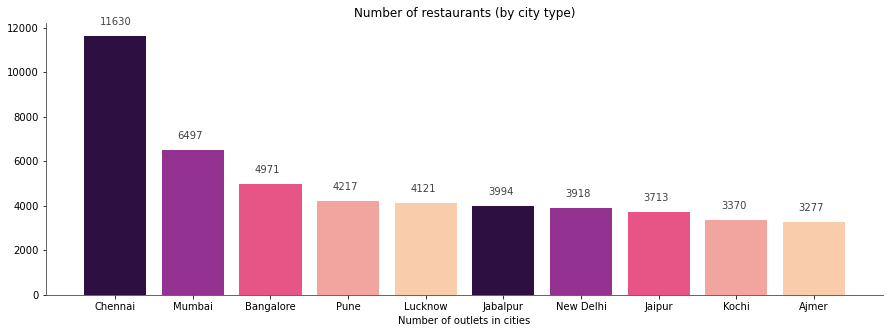

In [57]:
fig=plt.figure(figsize=[15,5],frameon=False)
ax = fig.gca()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_color("#424242")
ax.spines["bottom"].set_color("#424242")


colors = ["#2d0f41",'#933291',"#e65586","#f2a49f","#f9cdac"]
plt.bar(total_rest_in_cities.index, total_rest_in_cities.values, color=colors)


plt.xlabel("Number of outlets in cities")

for i, v in enumerate(total_rest_in_cities):
    ax.text(i-0.2, v+500, str(v), color='#424242')
plt.title("Number of restaurants (by city type)")


plt.show()

As expected, metro cities have more number of restaurants than others with South India dominating the Top 4

Aggregate rating by city:

In [66]:
rat_city=zomato_data.groupby('city').mean()['aggregate_rating'].sort_values(ascending=False)[:10].round(2)

In [67]:
rat_city

city
Bangalore       4.07
Gurgaon         4.05
Hyderabad       4.04
Secunderabad    4.02
Mumbai          4.00
Chennai         3.97
New Delhi       3.94
Kolkata         3.94
Pune            3.93
Chandigarh      3.93
Name: aggregate_rating, dtype: float64

Total number of different cuisines counts

Text(0.5, 1.0, 'Number of restaurants (by cuisines type)')

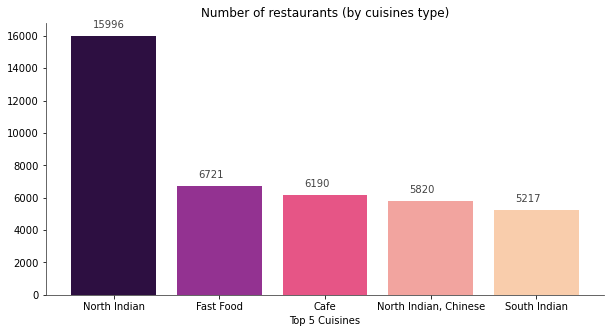

In [82]:
cuisines_counts=zomato_data['cuisines'].value_counts()[:5]
fig=plt.figure(figsize=[10,5],frameon=False)
ax = fig.gca()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_color("#424242")
ax.spines["bottom"].set_color("#424242")


colors = ["#2d0f41",'#933291',"#e65586","#f2a49f","#f9cdac"]
plt.bar(cuisines_counts.index, cuisines_counts.values, color=colors)


plt.xlabel("Top 5 Cuisines")

for i, v in enumerate(cuisines_counts):
    ax.text(i-0.2, v+500, str(v), color='#424242')
plt.title("Number of restaurants (by cuisines type)")



Surprisingly, Chinese food comes fourth in the list of cuisines that Indians prefer, even more than fast food, cafe and South Indian food.

In [88]:
from wordcloud import WordCloud

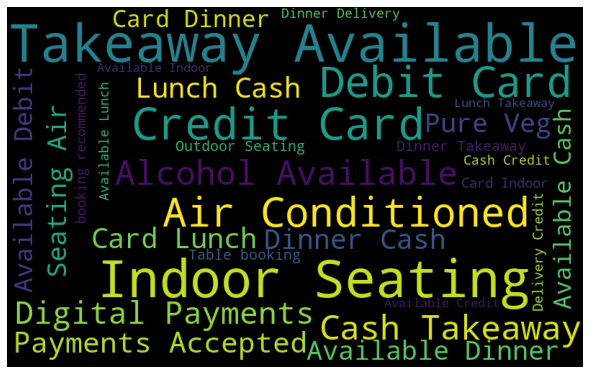

In [90]:
hl_str = ""
for i in hl:
    hl_str += str(i) + " "
wordcloud = WordCloud(width = 800, height = 500, 
                background_color ='black', 
                min_font_size = 10, max_words=30).generate(hl_str) 
                         
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

Rating distribution:

Text(0.5, 1.0, 'rating distribution')

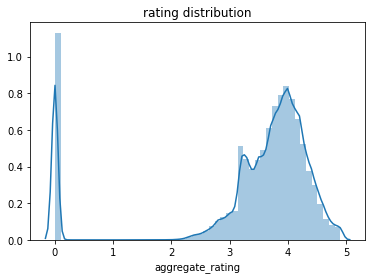

In [93]:
sns.distplot(zomato_data['aggregate_rating'])
plt.title('rating distribution')

On average, majority of restaurants have rating between 3 to 4 with fewer restaurants managing to go beyond 4.

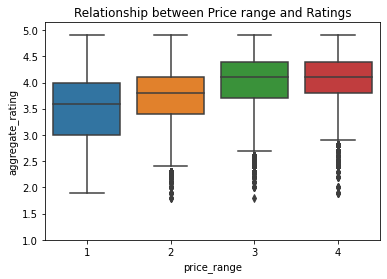

In [95]:
sns.boxplot(x='price_range', y='aggregate_rating', data=zomato_data)
plt.ylim(1)
plt.title("Relationship between Price range and Ratings")
plt.show()

# Thankyou:)